# **Loan Portfolios and Similarity Measures**

In [1]:
# [Description] Import packages.

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import itertools as it

In [2]:
def normalize(arr, axis=1):
    """
    행렬의 원소들을 합이 1이 되도록 변환합니다.

    Args:
        arr: Numpy 행렬
        axis: 합을 계산할 축 (0: 행, 1: 열)
        
    Returns:
        변환된 행렬
    """
    sums = np.sum(arr, axis=axis)
    
    return arr / sums[:, None]

In [3]:
# [Description] Generate an arbitrary loan portfolio matrix for simulation.

N = 20 # the number of banks
K = 15 # the number of assets
T = np.arange(20) + 1 # the list of time index

A = dict() # A list of loan portfolio matrix (not normalized)
W = dict() # A list of loan portfolio matrix

# Generate an arbitrary loan portfolio matrix for each time period.
for t in T:
    rl = np.random.rand(N, K) # an arbitrary loan values of N banks and K assets.
    A[t] = pd.DataFrame(rl)
    W[t] = pd.DataFrame(normalize(rl))

## **The Generalized Jaccard Similarity**

$$ GenJacc^{t}_{i,j} = \frac{ \sum\limits^{K}_{k=1} \min(w^{t}_{i,k}, w^{t}_{j,k}) }{ \sum\limits^{K}_{k=1} \max(w^{t}_{i,k}, w^{t}_{j,k}) } \tag{1}$$

In [4]:
# [Description] Define the function of measures of portfolio simialarity - 1 : The Generalized Jaccard Similarity.

def genJacc(w):
    """
    
    """
    banks = it.combinations(w.index, 2)
    assets = w.columns

    genJaccList = []

    for i, j in banks:
        sumMin = 0
        sumMax = 0

        for k in assets:
            wMin = np.min([w.loc[i, k], w.loc[j, k]])
            wMax = np.max([w.loc[i, k], w.loc[j, k]])
    
            sumMin += wMin
            sumMax += wMax

        genJacc = sumMin / sumMax

        genJaccList.append(genJacc)
    
    return genJaccList

In [5]:
# [Description] Simulated - Compute the mean of Generalized Jaccard Similarity each period.

genJaccMeans = []

for t in T:
    genJaccMeans.append(np.mean(genJacc(W[t])))

genJaccMeans = pd.DataFrame(genJaccMeans, index=T)

## **The Euclidean Distance**

$$ Distance^{t}_{i, j} = \sqrt{ \sum\limits^{K}_{k=1} (w^{t}_{i,k} - w^{t}_{j,k})^2 } \tag{2} $$

$$ SimDist^{t}_{i, j} = \frac{1}{1 + Distance^{t}_{i,j}} \tag{3} $$

In [6]:
# [Description] Define the function of measures of portfolio simialarity - 2 : The Similarity Distance.

def simDist(w):
    """
    
    """
    banks = it.combinations(w.index, 2)
    assets = w.columns
    
    simDistList = []
    
    for i, j in banks:
        
        sumDist = 0
        
        for k in assets:
            dist = (w.loc[i, k] - w.loc[j, k]) ** 2
            sumDist += dist
        
        sumDist = np.sqrt(sumDist)
        
        simDistList.append(1 / (1 + sumDist))
    
    return simDistList

In [7]:
# [Description] Simulated - Compute the mean of Similarity Distance each period.

simDistMeans = []

for t in T:
    simDistMeans.append(np.mean(simDist(W[t])))

simDistMeans = pd.DataFrame(simDistMeans, index=T)

## **The Connectedness of Differenct Assets**

$$Connected^{t}_{i,j} = \frac{ \sum\limits_{k \in \mathcal{H}^{t}_{i,j}} (w^{t}_{i,k} A^{t}_{i} + w^{t}_{j,k} A^{t}_{j}) }{ A^{t}_{i} + A^{t}_{j} } \tag{4}$$

In [8]:
# [Description] Define the function of measures of portfolio simialarity - 3 : The Connectedness.

def connected(w, a):
    """
    
    """
    pValue = a.sum(axis=1) # loan portfolio value of banks
    banks = it.combinations(w.index, 2)
    assets = w.columns
    
    conList = []
    
    for i, j in banks:
        
        ai = pValue.loc[i]
        aj = pValue.loc[j]
        
        sumCon = 0
        
        for k in assets:
            wi = w.loc[i, k]
            wj = w.loc[j, k]
            
            if wi * wj > 0:
                sumCon += wi * ai + wj * aj
        
        conList.append(sumCon / (ai + aj))
    
    return conList
                

In [9]:
# [Description] Simulated - Compute the mean of Similarity Distance each period.

conMeans = []

for t in T:
    conMeans.append(np.mean(connected(W[t], A[t])))

conMeans = pd.DataFrame(conMeans, index=T)

## **The Cosine Similarity**

$$ CoSim^{t}_{i,j} = \frac{ \sum\limits^{K}_{k=1} w^{t}_{i,k} w^{t}_{j,k} }{ \sqrt{\sum\limits^{K}_{k=1} (w^{t}_{i,k})^2} \sqrt{\sum\limits^{K}_{k=1} (w^{t}_{j,k})^2} } \tag{5} $$

In [10]:
# [Description] Define the function of measures of portfolio simialarity - 3 : The Cosine Similarity.

def coSim(w):
    """
    
    """
    banks = it.combinations(w.index, 2)
    assets = w.columns
    
    coSimList = []
    
    for i, j in banks:
        
        sumx = 0
        sumi = 0
        sumj = 0
        
        for k in assets:
            sumx += w.loc[i, k] * w.loc[j, k]
            sumi += w.loc[i, k] ** 2
            sumj += w.loc[j, k] ** 2
        
        coSim = sumx / (np.sqrt(sumi) * np.sqrt(sumj))
        
        coSimList.append(coSim)
    
    return coSimList

In [11]:
# [Description] Simulated - Compute the mean of Similarity Distance each period.

coSimMeans = []

for t in T:
    coSimMeans.append(np.mean(coSim(W[t])))

coSimMeans = pd.DataFrame(coSimMeans, index=T)

## **Visualization**

- Plot all four measures in one plot.

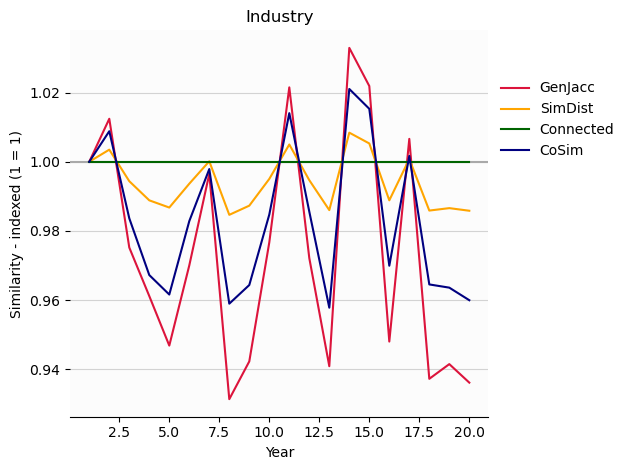

In [12]:
data = pd.concat([genJaccMeans, simDistMeans, conMeans, coSimMeans], axis=1)
data.columns = ['genJacc', 'simDist', 'connect', 'coSim']

fig, ax = plt.subplots()

ax.axhline(1, color='darkgray')
ax.plot(data.genJacc / data.genJacc.iloc[0], label='GenJacc', color='crimson')
ax.plot(data.simDist / data.simDist.iloc[0], label='SimDist', color='orange')
ax.plot(data.connect / data.connect.iloc[0], label='Connected', color='darkgreen')
ax.plot(data.coSim / data.coSim.iloc[0], label='CoSim', color='navy')

ax.set_axisbelow(True)
ax.legend(framealpha=0, loc='upper left', bbox_to_anchor=(1,0.9), scatterpoints=1)
ax.set_xlabel('Year')
ax.set_ylabel(f'Similarity - indexed ({data.index[0]} = 1)')
ax.grid(axis='y', color='lightgray')
ax.set_title('Industry')
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.set_facecolor('#FCFCFC')

fig.tight_layout()

## **Pairwise correlation between the similarity indicies**

In [13]:
data.corr()

,genJacc,simDist,connect,coSim
genJacc,1.000000,0.995151,NaN,0.990192
simDist,0.995151,1.000000,NaN,0.997308
connect,NaN,NaN,NaN,NaN
coSim,0.990192,0.997308,NaN,1.000000


## **Concentration**

In [27]:
conc3 = []
conc5 = []
conc10 = []

for t in T:
    assets_ranked = A[t].sum(axis=1).sort_values(ascending=False)

    conc3.append(assets_ranked.iloc[:3].sum() / assets_ranked.sum())
    conc5.append(assets_ranked.iloc[:5].sum() / assets_ranked.sum())
    conc10.append(assets_ranked.iloc[:10].sum() / assets_ranked.sum())

df_conc3 = pd.DataFrame(conc3, index=T)
df_conc5 = pd.DataFrame(conc5, index=T)
df_conc10 = pd.DataFrame(conc10, index=T)

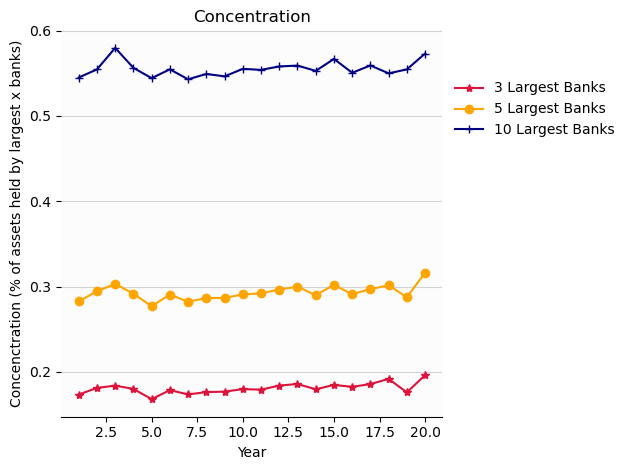

In [31]:
fig, ax = plt.subplots()

ax.plot(df_conc3, label='3 Largest Banks', marker='*', color='crimson')
ax.plot(df_conc5, label='5 Largest Banks', marker='o', color='orange')
ax.plot(df_conc10, label='10 Largest Banks', marker='+', color='navy')

ax.set_axisbelow(True)
ax.legend(framealpha=0, loc='upper left', bbox_to_anchor=(1,0.9), scatterpoints=1)
ax.set_xlabel('Year')
ax.set_ylabel('Concenctration (% of assets held by largest x banks)')
ax.grid(axis='y', color='lightgray')
ax.set_title('Concentration')
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.set_facecolor('#FCFCFC')

fig.tight_layout()